# Customer segmentation for online retail

### Project Overview

- You have been provided invoice data of the customer. Your aim is to check out the customers behavior based on the **CutomerId,InvoiceNo,Quantity,UnitPrice,Country etc**.
- This is an unsupervised leaning project.

### Dataset
The dataset has details of 541,909 entries with the following 8 features

#### Features:
- **InvoiceNo**: Invoice Number
- **StockCode**: Stock code
- **Description**: Item details
- **Quantity**: Quantity purchased by customer
- **InvoiceDate**: Invoice Date on which item purchased
- **UnitPrice**: Price of the item
- **CustomerID**: Customer ID
- **Country**: Country name

#### Target:
- **2016 Deposits**

#### Objective:
The objective is to understand customer behaviour.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Onlineretail-GP.csv')

In [3]:
df.head()

,ID,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.head()

,ID,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
ID             541909 non-null int64
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(2), object(5)
memory usage: 37.2+ MB


In [6]:
df.isnull().any()

ID             False
InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
dtype: bool

In [7]:
df.isnull().sum()

ID                  0
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
df.dropna(subset=['Description','CustomerID'],inplace=True)

In [9]:
df.isnull().sum()

ID             0
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [10]:
df = df[df.Country=='United Kingdom']

In [11]:
df['Return'] = df.InvoiceNo.str.contains('C')

In [12]:
df['Purchase'] = np.where(df["Return"]==True,0,1)

In [13]:
df.head()

,ID,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Return,Purchase
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,False,1
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,False,1
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,False,1
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,False,1
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,False,1


In [14]:
customers = pd.DataFrame({'CustomerID': df['CustomerID'].unique()},dtype=int)

In [15]:
# calculate the recency
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Recency'] = pd.to_datetime("2011-12-10") - (df['InvoiceDate'])

# remove the time factor
df.Recency = df.Recency.dt.days

In [16]:
# purchase equal to one 
temp = df[df['Purchase']==1]

# customers latest purchase day
recency=temp.groupby(by='CustomerID',as_index=False).min()
customers=customers.merge(recency[['CustomerID','Recency']],on='CustomerID')

In [17]:
#Frequency of purchase

temp_1 = df[['CustomerID','InvoiceNo','Purchase']]
temp_1.drop_duplicates(subset=['InvoiceNo'], inplace=True)

annual_invoice = temp_1.groupby(by='CustomerID',as_index=False).sum()
annual_invoice.rename(columns={'Purchase':'Frequency'}, inplace=True)

customers = customers.merge(annual_invoice,on='CustomerID')
print(customers.shape)

(3921, 3)


C:\Users\Mrunal\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [18]:
#Calculate Monetary

df['Amount'] = df.Quantity * df.UnitPrice

annual_sales = df.groupby(by='CustomerID',as_index=False).sum()
annual_sales.rename(columns={'Amount':'monetary'}, inplace=True)

customers = customers.merge(annual_sales[['CustomerID','monetary']],on='CustomerID')

In [19]:
#Data preprocessing
customers['monetary']=np.where(customers['monetary']<0,0,customers['monetary'])    

customers['Recency_log']=np.log(customers['Recency']+0.1)
customers['Frequency_log']=np.log(customers['Frequency'])
customers['Monetary_log']=np.log(customers['monetary']+0.1)

In [20]:
#Unsupervised learning - KMeans clustering

from sklearn.cluster import KMeans

# code starts here
dist=[]

k = range(1,10)

for i in k:
    km = KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(customers)
    dist.append(km.inertia_)

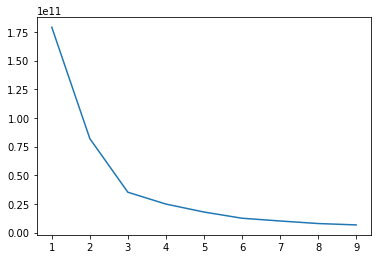

In [21]:
plt.plot(range(1,10),dist)
plt.show()

### We see the elbow bend at 3 clusters

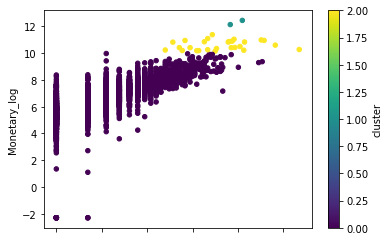

In [22]:
cluster = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)

# create 'cluster' column
customers['cluster'] = cluster.fit_predict(customers.iloc[:,1:7])

# plot the cluster
customers.plot.scatter(x= 'Frequency_log', y= 'Monetary_log', c='cluster', colormap='viridis')
plt.show()